In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pprint import pprint
import json

In [2]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = 10,8

In [3]:
def get_sheet_name(level_nr):
    assert level_nr in range(1,5)
    return "L{}_Consumers_only_g_day".format(level_nr)

def get_sheet_by_index(level_nr):
    assert 1 <= level_nr < len(dfs) + 1
    return dfs[get_sheet_name(level_nr)]

def get_level_column(level_nr):
    assert level_nr in range(1,5)
    return "Foodex L{}".format(level_nr)

In [4]:
dfs = pd.read_excel(
    "../data/chronicgdayconsumers.xlsx", 
    sheet_name=[get_sheet_name(i) for i in range(1,5)], 
    skiprows=[0,1], 
    header=[0])

In [5]:
for name in dfs:
    df = dfs[name]
    print("=" * 100)
    print("{}: {}".format(name, df.shape))
    display(df.sample(3))

L1_Consumers_only_g_day: (2133, 16)


Country                                          Survey  \
1388  United Kingdom  National Diet and Nutrition Survey - Years 1-3   
526          Germany                    National Nutrition Survey II   
182          Belgium                               Regional Flanders   

         Pop Class                                          Foodex L1  \
1388  Very elderly    Meat and meat products (including edible offal)   
526        Elderly  Fish and other seafood (including amphibians, ...   
182       Toddlers                 Animal and vegetable fats and oils   

          Metrics  Nr Consumers  % Consumers       Mean        STD         P5  \
1388  A.01.000727           127     0.913669  74.312723  40.155414  21.250000   
526   A.01.000876           613     0.305583  70.850245  52.425234   7.500000   
182   A.01.001346            34     0.944444   8.759941   8.828302   0.666667   

         P10     Median         P95       P97.5         P99  \
1388  27.850  72.750000  146.750000  161.150000  173.850000   
526   13.500  56.700000  167.500000  209.150000  242.000000   
182    0.838   7.252333   18.171333   46.333333   46.333333   

                                                Comment  
1388  Number of observations lower than 300, the 99t...  
526                                                      
182   Number of observations lower than 60, the 95th...

L2_Consumers_only_g_day: (10861, 17)


Country                                             Survey    Pop Class  \
760   Belgium                                 Diet National 2004      Elderly   
2     Austria  Austrian Study on Nutritional Status 2010-12 -...       Adults   
2421  Germany            Eating Study as a KiGGS Module (EsKiMo)  Adolescents   

                            Foodex L1                Foodex L2      Metrics  \
760           Milk and dairy products        Concentrated milk  A.01.000973   
2     Grains and grain-based products          Bread and rolls  A.01.000098   
2421          Milk and dairy products  Fermented milk products  A.01.001027   

      Nr Consumer  % Consumers        Mean        STD         P5        P10  \
760             9     0.017613    7.861111  11.274578   0.800000   0.800000   
2             294     0.954545  128.077211  62.250345  50.000000  50.000000   
2421          192     0.488550   62.192045  49.606428   2.088333   6.107333   

      Median         P95       P97.5    P99 Comment  
760      3.0   30.000000   30.000000   30.0          
2      125.0  241.950000  250.000000  300.0          
2421    50.0  151.354333  191.516667  205.0

L3_Consumers_only_g_day: (37069, 17)


Country                                             Survey  \
26012  Hungary                                 National Repr Surv   
6424   Germany  Consumption Survey of Food Intake among Infant...   
25983  Hungary                                 National Repr Surv   

            Pop Class                Foodex L2                      Foodex L3  \
26012    Very elderly              Soft drinks      Soft drink, fruit content   
6424   Other children           Preserved meat                      Ham, pork   
25983    Very elderly  Fermented milk products  Yoghurt, cow milk, with fruit   

           Metrics  Nr Consumer  % Consumers        Mean        STD  \
26012  A.01.001472            1     0.012500  166.666667   0.000000   
6424   A.01.000796           97     0.331058    4.499749   5.642557   
25983  A.01.001032            2     0.025000   83.333333  23.570226   

               P5         P10      Median         P95       P97.5         P99  \
26012  166.666667  166.666667  166.666667  166.666667  166.666667  166.666667   
6424     0.358333    0.496667    2.333333   14.666667   16.666667   40.828333   
25983   66.666667   66.666667   83.333333  100.000000  100.000000  100.000000   

                                                 Comment  
26012  Number of observations lower than 300, the 99t...  
6424   Number of observations lower than 300, the 99t...  
25983  Number of observations lower than 300, the 99t...

L4_Consumers_only_g_day: (43868, 17)


Country                                          Survey  \
41419          Sweden                    National Food Administration   
27977  United Kingdom  National Diet and Nutrition Survey - Years 1-3   
28063  United Kingdom  National Diet and Nutrition Survey - Years 1-3   

            Pop Class            Foodex L3            Foodex L4      Metrics  \
41419  Other children     Juice, Pineapple     Juice, Pineapple  A.01.001399   
27977          Adults        Luncheon meat        Luncheon meat  A.01.000809   
28063          Adults  Cheese, Wensleydale  Cheese, Wensleydale  A.01.001236   

       Nr Consumer  % Consumers        Mean        STD       P5     P10  \
41419            1     0.000679  187.500000   0.000000  187.500  187.50   
27977            5     0.003949   19.550000   8.212795   10.000   10.00   
28063           14     0.011058   16.580357  12.385499    4.375    4.95   

       Median     P95   P97.5     P99 Comment  
41419   187.5  187.50  187.50  187.50          
27977    21.0   31.50   31.50   31.50          
28063    15.0   38.75   38.75   38.75

In [6]:
cat_names = sorted(set(
    [c for df in dfs.values() for c in df.columns if c.startswith("Foodex")]))
cats = [df.drop([t for t in df.columns if t not in cat_names], axis=1).drop_duplicates() for df in dfs.values()]

categories = cats[-1]
for i in range(2,0,-1):
    c = cat_names[i]
    categories = categories.set_index(c).join(cats[i].set_index(c)).reset_index()

categories = categories[cat_names]
categories.head(10)

Foodex L1  \
0                                Alcoholic beverages   
1                                Alcoholic beverages   
2                                Alcoholic beverages   
3                                Alcoholic beverages   
4                                Alcoholic beverages   
5  Fish and other seafood (including amphibians, ...   
6  Fish and other seafood (including amphibians, ...   
7                 Animal and vegetable fats and oils   
8                 Animal and vegetable fats and oils   
9                 Animal and vegetable fats and oils   

                               Foodex L2                           Foodex L3  \
0                    Alcoholic beverages                 Alcoholic beverages   
1                 Alcoholic mixed drinks              Alcoholic mixed drinks   
2                 Alcoholic mixed drinks                             Alcopop   
3                 Alcoholic mixed drinks                      Cocktail drink   
4                 Alcoholic mixed drinks                               Punch   
5  Amphibians, reptiles, snails, insects               Frog legs (Rana spp.)   
6  Amphibians, reptiles, snails, insects                   Snail (Helix sp.)   
7     Animal and vegetable fats and oils  Animal and vegetable fats and oils   
8                             Animal fat                          Animal fat   
9                             Animal fat                              Butter   

                            Foodex L4  
0                 Alcoholic beverages  
1              Alcoholic mixed drinks  
2                             Alcopop  
3                      Cocktail drink  
4                               Punch  
5               Frog legs (Rana spp.)  
6                   Snail (Helix sp.)  
7  Animal and vegetable fats and oils  
8                          Animal fat  
9                              Butter

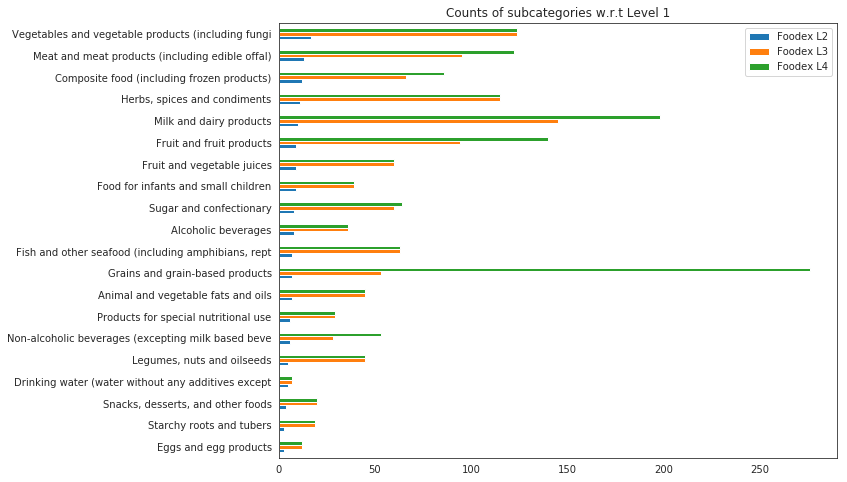

In [7]:
ax = (categories
      .groupby(cat_names[0])
      .nunique()
#       .apply(lambda x: x/sum(x))
      .drop(cat_names[0], axis=1)
      .sort_values(cat_names[1:])
      .plot.barh())

ax.set_ylabel(None)
ax.set_title("Counts of subcategories w.r.t Level 1");

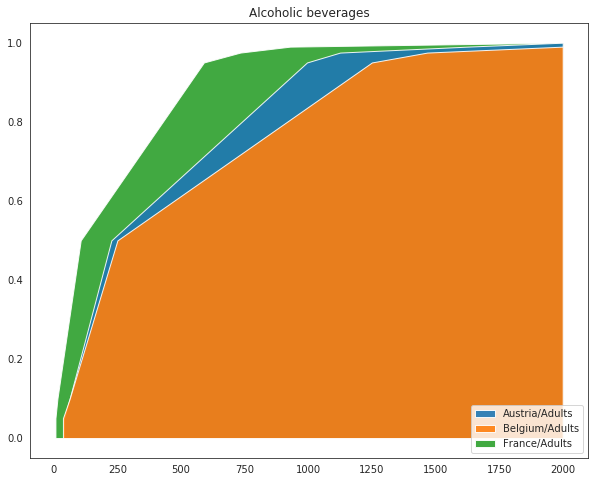

In [8]:
def df_filter(df, filter_dict):
    df = df.copy()
    for column, values in filter_dict.items():
        assert column in df.columns, "Column not found: {}".format(column)
        values = values if type(values) == list else [values]
        df = df.loc[df[column].isin(values)]
        assert len(df) > 1, "No values left: {}".format(values)
    return df

def plot_category_distribution(level_nr, level_name, filters={}):
    df = get_sheet_by_index(level_nr)
    filter_dict = filters.copy()
    filter_dict[get_level_column(level_nr)] = level_name
    df = df_filter(df, filter_dict)
    
    ax = plt.subplot()
    ax.set_title(level_name)
    yy = np.array([.05, .1, .5, .95, .975, .99])
    x_max = df["P99"].max()
    zorders = df["P99"].rank().astype(int)
    
    for i, row in df.iterrows():
        xx = row[["P5", "P10", "Median", "P95", "P97.5", "P99"]].values.astype(float)
        this_yy = yy if xx[-1] == x_max else np.concatenate([yy, [1.]])
        xx = xx if xx[-1] == x_max else np.concatenate([xx, [x_max]])
        ax.fill_between(xx, this_yy, alpha=.9, label="/".join([row[col] for col in filters]), zorder=zorders.loc[i])

    plt.legend(loc=4)
    
filters = {"Country": ["Austria", "Belgium", "France"], "Pop Class": ["Adults"]}
plot_category_distribution(1, "Alcoholic beverages", filters)

In [9]:
alcoolic_bevs = categories.loc[categories[get_level_column(1)] == "Alcoholic beverages", get_level_column(3)]
df = get_sheet_by_index(4)
df_filter(df[df[get_level_column(3)].isin(alcoolic_bevs)], filters).groupby(["Country", "Pop Class"]).sum()

Nr Consumer  % Consumers         Mean          STD  \
Country Pop Class                                                       
Austria Adults             193     0.626623  1964.720830   955.502716   
Belgium Adults            1212     0.938080  3370.009855  2898.884109   
France  Adults            4264     1.873462  1008.403459  1042.706668   

                            P5          P10       Median          P95  \
Country Pop Class                                                       
Austria Adults     1167.500000  1205.000000  1622.500000  3435.000000   
Belgium Adults     1042.900000  1189.300000  2470.600000  8555.600000   
France  Adults      230.607571   277.857143   658.928571  3024.438095   

                          P97.5          P99  
Country Pop Class                             
Austria Adults      3935.000000   4997.50000  
Belgium Adults     10905.450000  11882.95000  
France  Adults      4098.452381   5283.02381

In [11]:
def categories_to_json():

    d = {
        l1: {
            l2: {
                l3: list(g3[cat_names[-1]]) for l3, g3 in g2.groupby(cat_names[2])
            }
            for l2, g2 in g1.groupby(cat_names[1])
        } for l1, g1 in categories.groupby(cat_names[0])
    }

    with open("categories.json", "w") as f:
        json.dump(d, f)
        
categories_to_json()

In [1]:
import sys
sys.path.append("../src")
from data import data

Loading data...


In [2]:
from utils import load_json
categories = load_json("../data/categories.json")

In [3]:
for l1 in categories:
    print(len(data.get_country_mean(1, l1)))
    for l2 in categories[l1]:
        print(f"\t{len(data.get_country_mean(2, l2))}")

2
	2
	2
	2
	2
	2
	2
	2
	2
2
	2
	2
	2
	2
	2
	2
	2
2
	2
	2
	2
	2
	2
	2
	2
	2
	2
	2
	2
	2
2
	2
	2
	2
	2
	2
2


AssertionError: No values left: ['Eggs and egg products']